In [14]:
from pathlib import Path
from glob import glob

#from tqdm.notebook import tqdm
!pip install tifffile
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

import rasterio
%matplotlib inline
import matplotlib.pyplot as plt

     |████████████████████████████████| 184kB 29.6MB/s 


In [35]:
def load_data(fp):
    data = tiff.imread(str(fp))
    return data

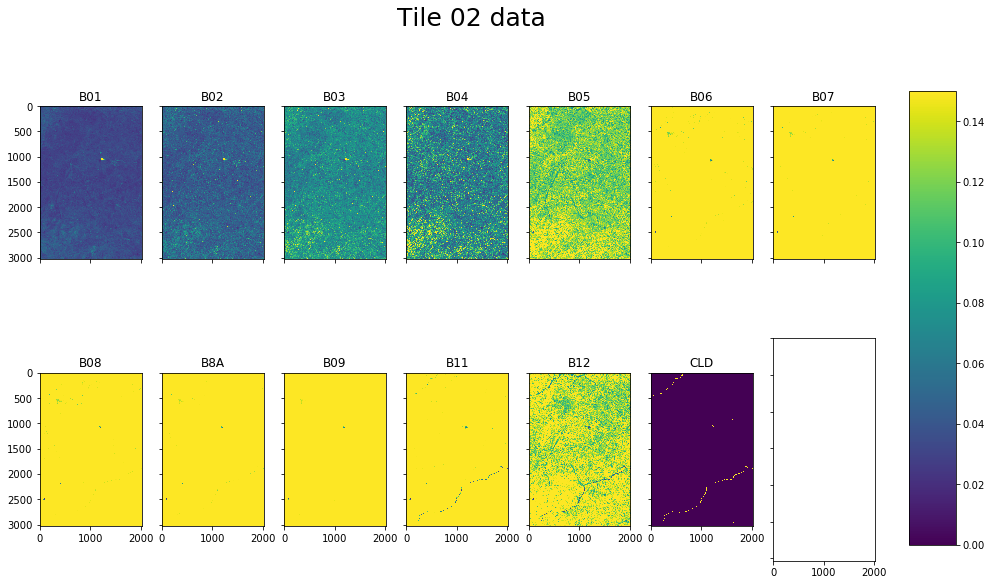

In [69]:

ss_path = '/shared_space/'
tile = '02'
date_ = '20190825'
# band = 'B03'
collection_path = Path('/shared_space/KENYA_CROP/data/ref_african_crops_kenya_02_source')


bands = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'CLD']
fig, axs = plt.subplots(2, 7, figsize=(16,9), sharex=True, sharey=True)
axs = axs.ravel()
print(axs)
fig.suptitle('Tile 02 data', size=25)
for i, b in enumerate(bands):
    img_path = collection_path / f"ref_african_crops_kenya_02_tile_{tile}_{date_}/{b}.tif"
    band_data = load_data(img_path)
    
    axs[i].title.set_text(b)
    d = axs[i].imshow(band_data, vmin=0, vmax=0.15)

# add space for colour bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(d, cax=cbar_ax)


In [113]:
label_path = Path('/shared_space/KENYA_CROP/data/ref_african_crops_kenya_02_labels/ref_african_crops_kenya_02_tile_03_label/raster_labels.tif')
#img_path = collection_path / 
d = load_data(label_path)
import matplotlib
import matplotlib.cm as cm
lst = list(set(i for j in d for i in j))
minima = 1
maxima = max(lst)
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
mapper_list = [mapper.to_rgba(x)[0] for x in lst]

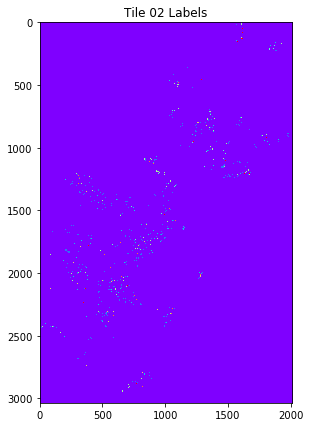

In [114]:
fig = plt.figure(figsize=(7, 7))
plt.title('Tile 02 Labels')
t = plt.imshow(d, cmap=plt.get_cmap('rainbow', len(lst)))


In [103]:
res = list(set(i for j in d for i in j))


In [98]:
d.max()

4797

In [97]:
d.shape

(3035, 2016)

AttributeError: 'numpy.ndarray' object has no attribute 'count_nonzero'